In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

In [82]:
data = pd.read_csv('kmeans_dataset.csv') 

In [83]:
data.head()

,Hardwork,Skills,Label
0,1.483358,6.135020,C Tier
1,52.864104,48.897037,B Tier
2,67.556683,19.359183,D Tier
3,52.797684,43.650076,B Tier
4,45.060080,74.978268,B Tier


In [84]:
mydata=data.drop('Label', axis =1)
mydata.dropna(subset=['Hardwork'], inplace = True)
mydata.dropna(subset=['Skills'], inplace = True)
for x in mydata.index:
  if mydata.loc[x, "Hardwork"] > 100:
    mydata.drop(x, inplace = True)
for x in mydata.index:
  if mydata.loc[x, "Skills"] > 100:
    mydata.drop(x, inplace = True)
mydata.head()

,Hardwork,Skills
0,1.483358,6.135020
1,52.864104,48.897037
2,67.556683,19.359183
3,52.797684,43.650076
4,45.060080,74.978268


In [85]:
mydata.info()
print(mydata.duplicated())
mydata.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 459
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hardwork  460 non-null    float64
 1   Skills    460 non-null    float64
dtypes: float64(2)
memory usage: 30.8 KB
0      False
1      False
2      False
3      False
4      False
       ...  
455    False
456    False
457    False
458    False
459    False
Length: 460, dtype: bool


In [86]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hardwork,460.0,47.019178,24.895360,0.712341,25.287181,48.519039,67.467031,97.618528
Skills,460.0,38.439590,26.136017,1.447058,13.987334,38.515372,60.161463,95.704652


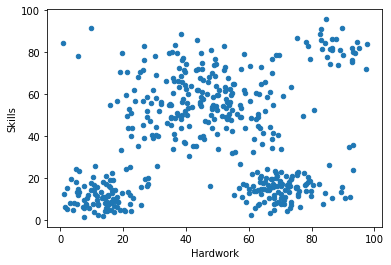

In [87]:
mydata.plot(kind = 'scatter', x = 'Hardwork', y = 'Skills')
plt.show()

In [88]:
#scale the data
from scipy.stats import zscore

mydata_z = mydata.apply(zscore)


In [89]:
mydata_z.head(10)

,Hardwork,Skills
0,-1.831080,-1.237363
1,0.235035,0.400552
2,0.825851,-0.730837
3,0.232364,0.199577
4,-0.078779,1.399542
5,1.562602,1.374199
6,-0.338896,1.043153
7,-0.932610,0.703361
8,-0.060593,0.744035
9,-0.086345,0.781817


Text(0.5, 1.0, 'Selecting k with elbow method')

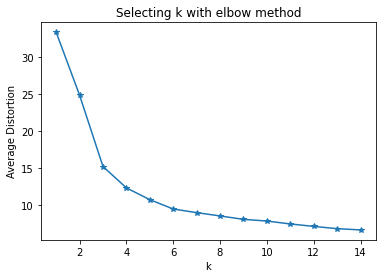

In [90]:
#finding optimal number of clusters 
from scipy.spatial.distance import cdist
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata)
    prediction=model.predict(mydata)
    meanDistortions.append(sum(np.min(cdist(mydata, model.cluster_centers_, 'euclidean'), axis=1)) / mydata.shape[0])
    
plt.plot(clusters, meanDistortions, '*-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with elbow method')

In [91]:
#set the value of k=4
kmeans = KMeans(n_clusters=4)


In [92]:
kmeans.fit(mydata_z)


KMeans(n_clusters=4)

In [93]:
centroids=kmeans.cluster_centers_


In [94]:
centroids

array([[-0.21311716,  0.74382599],
       [ 0.93296744, -0.80919971],
       [-1.33074893, -1.01342853],
       [ 1.35542865,  1.46490646]])

In [95]:
centroid_df = pd.DataFrame(centroids, columns = list(mydata_z))


In [96]:
print(centroid_df)

   Hardwork    Skills
0 -0.213117  0.743826
1  0.932967 -0.809200
2 -1.330749 -1.013429
3  1.355429  1.464906


In [97]:
kmeans.labels_

array([2, 0, 1, 0, 0, 3, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 3, 1, 1, 2, 2,
       0, 1, 2, 2, 0, 2, 3, 1, 2, 0, 0, 2, 3, 3, 2, 1, 2, 1, 1, 0, 1, 0,
       3, 3, 1, 1, 0, 2, 2, 0, 3, 3, 0, 2, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2,
       1, 0, 2, 1, 2, 3, 0, 2, 0, 1, 0, 1, 3, 1, 3, 0, 2, 2, 2, 0, 0, 2,
       2, 0, 0, 3, 3, 1, 0, 1, 3, 2, 0, 0, 3, 1, 2, 1, 1, 0, 1, 0, 2, 2,
       0, 1, 1, 2, 1, 1, 0, 2, 3, 1, 1, 1, 1, 0, 1, 1, 3, 1, 2, 2, 3, 2,
       2, 1, 0, 0, 1, 2, 1, 0, 0, 3, 2, 3, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 3,
       3, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 3, 0, 2,
       2, 0, 2, 0, 1, 0, 3, 0, 1, 0, 0, 0, 1, 0, 1, 1, 3, 1, 0, 0, 0, 2,
       0, 2, 1, 0, 3, 0, 1, 2, 0, 3, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0,

In [98]:
#creating a new dataframe only for labels and concerting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_, columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')


In [99]:
#joining the label dataframe with dataframe
df_labeled = mydata.join(df_labels)

In [100]:
df_analysis = (df_labeled.groupby(['labels'],axis=0)).head(4177)
df_analysis

,Hardwork,Skills,labels
0,1.483358,6.135020,2
1,52.864104,48.897037,0
2,67.556683,19.359183,1
3,52.797684,43.650076,0
4,45.060080,74.978268,0
...,...,...,...
455,48.414533,53.807818,0
456,49.534222,54.425778,0
457,30.457458,40.396009,0
458,2.277720,5.085407,2


In [101]:
df_labeled['labels'].value_counts()

0    186
1    124
2    104
3     46
Name: labels, dtype: int64

In [102]:
km = KMeans(n_clusters=4)
km.fit(mydata)

KMeans(n_clusters=4)

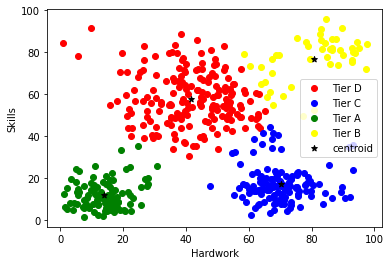

In [103]:
df0=df_labeled[df_labeled.labels==0]
df1=df_labeled[df_labeled.labels==1]
df2=df_labeled[df_labeled.labels==2]
df3=df_labeled[df_labeled.labels==3]
plt.scatter(df0.Hardwork,df0.Skills,color ='red',label='Tier D')
plt.scatter(df1.Hardwork,df1.Skills,color ='blue',label='Tier C')
plt.scatter(df2.Hardwork,df2.Skills,color ='green',label='Tier A')
plt.scatter(df3.Hardwork,df3.Skills,color ='yellow',label='Tier B')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Hardwork')
plt.ylabel('Skills')
plt.legend()